In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.utils import shuffle
from keras.optimizers import RMSprop

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from imblearn.over_sampling import KMeansSMOTE, SMOTE
from sklearn.model_selection import StratifiedKFold

In [8]:
import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle



In [9]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

test_split = 0.1 #portion of data used for testing
 #portion of training data used for validation
    
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [10]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 27)           837         input_2[0][0]                    
______________________________________________________________________________

454904/454904 [==============================] - 25s 55us/step - loss: 15.7590 - rec_loss: 25.5201 - kl_loss: 4.5358 - val_loss: 13.6119 - val_rec_loss: 23.9556 - val_kl_loss: 2.6598
Epoch 16/150
454904/454904 [==============================] - 25s 55us/step - loss: 15.4871 - rec_loss: 25.0101 - kl_loss: 4.5264 - val_loss: 13.6363 - val_rec_loss: 24.0218 - val_kl_loss: 2.6431
Epoch 17/150
454904/454904 [==============================] - 25s 55us/step - loss: 15.3826 - rec_loss: 24.8155 - kl_loss: 4.5337 - val_loss: 13.5660 - val_rec_loss: 23.7049 - val_kl_loss: 2.8508
Epoch 18/150
454904/454904 [==============================] - 25s 55us/step - loss: 15.2119 - rec_loss: 24.4776 - kl_loss: 4.5429 - val_loss: 13.4583 - val_rec_loss: 23.5406 - val_kl_loss: 2.8105
Epoch 19/150
454904/454904 [==============================] - 25s 55us/step - loss: 15.1587 - rec_loss: 24.3757 - kl_loss: 4.5543 - val_loss: 13.4444 - val_rec_loss: 23.4983 - val_kl_loss: 2.8179
Epoch 20/150
454904/454904 [=====

Epoch 57/150
454904/454904 [==============================] - 25s 55us/step - loss: 16.2955 - rec_loss: 26.1568 - kl_loss: 4.8176 - val_loss: 13.6989 - val_rec_loss: 23.7004 - val_kl_loss: 2.9463
Epoch 58/150
454904/454904 [==============================] - 25s 55us/step - loss: 17.1273 - rec_loss: 27.8376 - kl_loss: 4.7908 - val_loss: 13.5802 - val_rec_loss: 23.5453 - val_kl_loss: 2.8376
Epoch 59/150
454904/454904 [==============================] - 25s 54us/step - loss: 17.4480 - rec_loss: 28.5190 - kl_loss: 4.7569 - val_loss: 13.5041 - val_rec_loss: 23.5386 - val_kl_loss: 2.7085
Epoch 60/150
454904/454904 [==============================] - 25s 55us/step - loss: 16.6544 - rec_loss: 27.0313 - kl_loss: 4.7254 - val_loss: 13.3466 - val_rec_loss: 23.2167 - val_kl_loss: 2.7173
Epoch 61/150
454904/454904 [==============================] - 25s 55us/step - loss: 16.3438 - rec_loss: 26.4213 - kl_loss: 4.7131 - val_loss: 13.3010 - val_rec_loss: 23.0959 - val_kl_loss: 2.7782
Epoch 62/150
454904/

Epoch 99/150
454904/454904 [==============================] - 25s 55us/step - loss: 14.8716 - rec_loss: 23.8427 - kl_loss: 4.6326 - val_loss: 13.0156 - val_rec_loss: 22.4976 - val_kl_loss: 2.9058
Epoch 100/150
454904/454904 [==============================] - 25s 55us/step - loss: 14.8665 - rec_loss: 23.8422 - kl_loss: 4.6331 - val_loss: 13.1881 - val_rec_loss: 22.8443 - val_kl_loss: 2.9122
Epoch 101/150
454904/454904 [==============================] - 25s 55us/step - loss: 14.8674 - rec_loss: 23.8564 - kl_loss: 4.6196 - val_loss: 13.0770 - val_rec_loss: 22.6438 - val_kl_loss: 2.9037
Epoch 102/150
454904/454904 [==============================] - 25s 55us/step - loss: 14.7652 - rec_loss: 23.6656 - kl_loss: 4.6170 - val_loss: 12.9851 - val_rec_loss: 22.5067 - val_kl_loss: 2.8414
Epoch 103/150
454904/454904 [==============================] - 25s 55us/step - loss: 14.8209 - rec_loss: 23.7719 - kl_loss: 4.6155 - val_loss: 13.0973 - val_rec_loss: 22.7528 - val_kl_loss: 2.8231
Epoch 104/150
45

454904/454904 [==============================] - 25s 54us/step - loss: 14.5524 - rec_loss: 23.1853 - kl_loss: 4.6464 - val_loss: 13.1334 - val_rec_loss: 22.8368 - val_kl_loss: 2.7237
Epoch 141/150
454904/454904 [==============================] - 25s 55us/step - loss: 14.5561 - rec_loss: 23.1982 - kl_loss: 4.6417 - val_loss: 13.0918 - val_rec_loss: 22.5892 - val_kl_loss: 2.8805
Epoch 142/150
454904/454904 [==============================] - 25s 55us/step - loss: 14.4837 - rec_loss: 23.0515 - kl_loss: 4.6478 - val_loss: 12.9598 - val_rec_loss: 22.1926 - val_kl_loss: 3.0065
Epoch 143/150
454904/454904 [==============================] - 24s 54us/step - loss: 14.5280 - rec_loss: 23.1492 - kl_loss: 4.6439 - val_loss: 13.1927 - val_rec_loss: 22.9147 - val_kl_loss: 2.7565
Epoch 144/150
454904/454904 [==============================] - 25s 54us/step - loss: 14.5129 - rec_loss: 23.1186 - kl_loss: 4.6423 - val_loss: 13.5986 - val_rec_loss: 23.6675 - val_kl_loss: 2.8134
Epoch 145/150
454904/454904 [

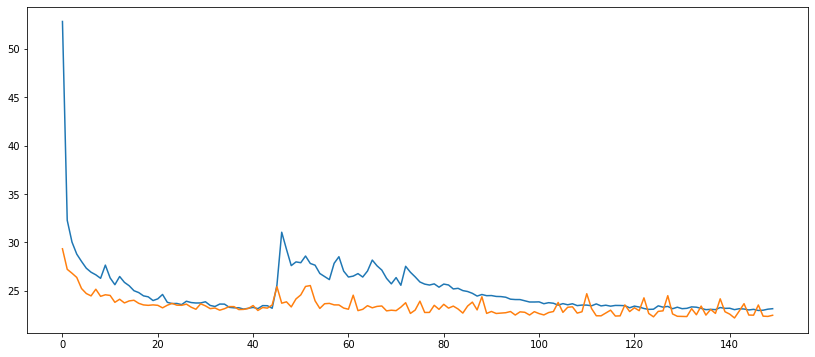

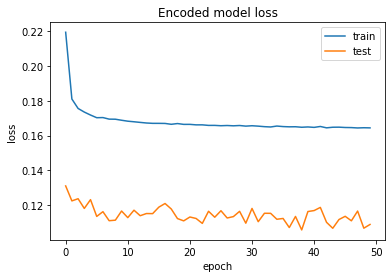

454904/454904 [==============================] - 25s 55us/step - loss: 16.8289 - rec_loss: 27.2170 - kl_loss: 4.2159 - val_loss: 14.5116 - val_rec_loss: 25.5166 - val_kl_loss: 2.4812
Epoch 6/150
454904/454904 [==============================] - 24s 53us/step - loss: 16.5525 - rec_loss: 26.8282 - kl_loss: 4.2340 - val_loss: 14.7919 - val_rec_loss: 26.2232 - val_kl_loss: 2.4558
Epoch 7/150
454904/454904 [==============================] - 25s 54us/step - loss: 14.8034 - rec_loss: 23.8434 - kl_loss: 4.3957 - val_loss: 12.8980 - val_rec_loss: 22.6922 - val_kl_loss: 2.5973
Epoch 20/150
454904/454904 [==============================] - 24s 53us/step - loss: 14.7784 - rec_loss: 23.8002 - kl_loss: 4.4006 - val_loss: 13.1782 - val_rec_loss: 23.0191 - val_kl_loss: 2.8365
Epoch 21/150
454904/454904 [==============================] - 24s 54us/step - loss: 14.2222 - rec_loss: 22.7154 - kl_loss: 4.4782 - val_loss: 13.1200 - val_rec_loss: 22.9219 - val_kl_loss: 2.8545
Epoch 38/150
454904/454904 [=======

454904/454904 [==============================] - 96s 212us/step - loss: 0.1753 - accuracy: 0.9328 - val_loss: 0.1198 - val_accuracy: 0.9798
Epoch 26/50
454904/454904 [==============================] - 96s 212us/step - loss: 0.1753 - accuracy: 0.9326 - val_loss: 0.1197 - val_accuracy: 0.9801
Epoch 27/50
454904/454904 [==============================] - 99s 218us/step - loss: 0.1751 - accuracy: 0.9327 - val_loss: 0.1226 - val_accuracy: 0.9788
Epoch 28/50
454904/454904 [==============================] - 98s 215us/step - loss: 0.1748 - accuracy: 0.9329 - val_loss: 0.1146 - val_accuracy: 0.9814
Epoch 29/50
454904/454904 [==============================] - 87s 191us/step - loss: 0.1745 - accuracy: 0.9330 - val_loss: 0.1267 - val_accuracy: 0.9777
Epoch 30/50
454904/454904 [==============================] - 88s 193us/step - loss: 0.1749 - accuracy: 0.9327 - val_loss: 0.1189 - val_accuracy: 0.9822
Epoch 31/50
454904/454904 [==============================] - 88s 194us/step - loss: 0.1747 - accurac

454904/454904 [==============================] - 26s 56us/step - loss: 13.8401 - rec_loss: 21.7500 - kl_loss: 4.7458 - val_loss: 12.9293 - val_rec_loss: 22.2657 - val_kl_loss: 2.9819
Epoch 90/150
454904/454904 [==============================] - 27s 59us/step - loss: 13.7848 - rec_loss: 21.6232 - kl_loss: 4.7619 - val_loss: 12.8776 - val_rec_loss: 21.9582 - val_kl_loss: 3.1878
Epoch 91/150
454904/454904 [==============================] - 34s 74us/step - loss: 13.8096 - rec_loss: 21.6878 - kl_loss: 4.7571 - val_loss: 12.8789 - val_rec_loss: 22.0169 - val_kl_loss: 3.1375
Epoch 92/150
454904/454904 [==============================] - 26s 57us/step - loss: 13.8121 - rec_loss: 21.6816 - kl_loss: 4.7571 - val_loss: 12.9628 - val_rec_loss: 22.2010 - val_kl_loss: 3.1147
Epoch 93/150
454904/454904 [==============================] - 26s 57us/step - loss: 13.8077 - rec_loss: 21.6640 - kl_loss: 4.7611 - val_loss: 13.7730 - val_rec_loss: 23.8257 - val_kl_loss: 3.1053
Epoch 94/150
454904/454904 [=====

Epoch 131/150
454904/454904 [==============================] - 27s 59us/step - loss: 14.1261 - rec_loss: 22.2451 - kl_loss: 4.7898 - val_loss: 13.0395 - val_rec_loss: 22.3539 - val_kl_loss: 3.0607
Epoch 132/150
454904/454904 [==============================] - 27s 59us/step - loss: 13.8814 - rec_loss: 21.7464 - kl_loss: 4.7947 - val_loss: 12.7892 - val_rec_loss: 21.7871 - val_kl_loss: 3.1326
Epoch 133/150
454904/454904 [==============================] - 27s 59us/step - loss: 13.8763 - rec_loss: 21.7366 - kl_loss: 4.7938 - val_loss: 12.7602 - val_rec_loss: 21.6183 - val_kl_loss: 3.2356
Epoch 134/150
454904/454904 [==============================] - 27s 58us/step - loss: 13.8336 - rec_loss: 21.6620 - kl_loss: 4.7909 - val_loss: 12.6822 - val_rec_loss: 21.5041 - val_kl_loss: 3.2133
Epoch 135/150
454904/454904 [==============================] - 27s 58us/step - loss: 13.8217 - rec_loss: 21.6500 - kl_loss: 4.7794 - val_loss: 12.8716 - val_rec_loss: 21.9889 - val_kl_loss: 3.0951
Epoch 136/150
4

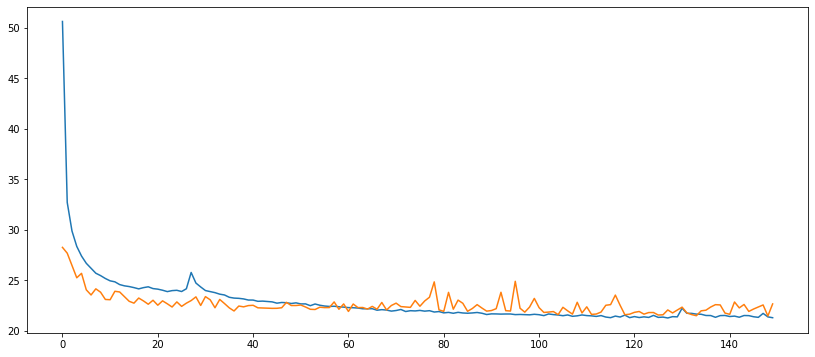

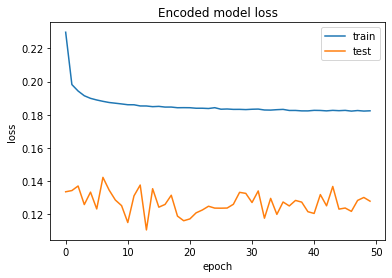

Overall accuracy of Convolutional Neural Network model: 0.9742279805480943


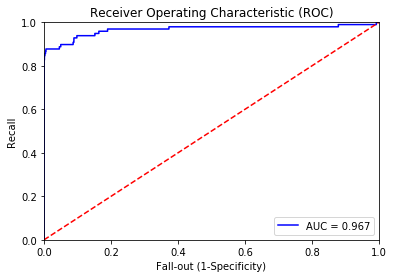

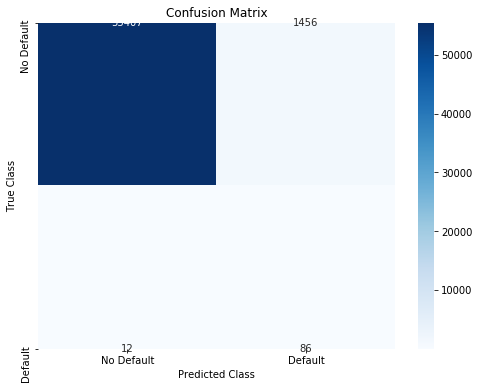

AUC(ROC): 0.9259728089748113
Precision: 0.055771725032425425
Recall: 0.8775510204081632
F1 score: 0.10487804878048781
False positives: 1456
True positives: 86
False negatives: 12
True negatives: 55407
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 30)           0                                            
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 27)           837         input_8[0][0]                    
______________________________________________________________________________

454904/454904 [==============================] - 25s 55us/step - loss: 16.1094 - rec_loss: 25.8211 - kl_loss: 4.7273 - val_loss: 13.4693 - val_rec_loss: 23.1663 - val_kl_loss: 3.0127
Epoch 75/150
454904/454904 [==============================] - 25s 56us/step - loss: 15.1950 - rec_loss: 24.1858 - kl_loss: 4.6613 - val_loss: 12.9408 - val_rec_loss: 22.2898 - val_kl_loss: 2.9539
Epoch 85/150
454904/454904 [==============================] - 26s 57us/step - loss: 15.3206 - rec_loss: 24.4317 - kl_loss: 4.6658 - val_loss: 12.9753 - val_rec_loss: 22.2573 - val_kl_loss: 3.0535
Epoch 86/150
454904/454904 [==============================] - 25s 55us/step - loss: 15.4213 - rec_loss: 24.6174 - kl_loss: 4.6946 - val_loss: 12.7615 - val_rec_loss: 21.9007 - val_kl_loss: 2.9971
Epoch 92/150
454904/454904 [==============================] - 26s 58us/step - loss: 14.8629 - rec_loss: 23.5469 - kl_loss: 4.6875 - val_loss: 13.0688 - val_rec_loss: 22.4360 - val_kl_loss: 3.0522
Epoch 101/150
454904/454904 [====

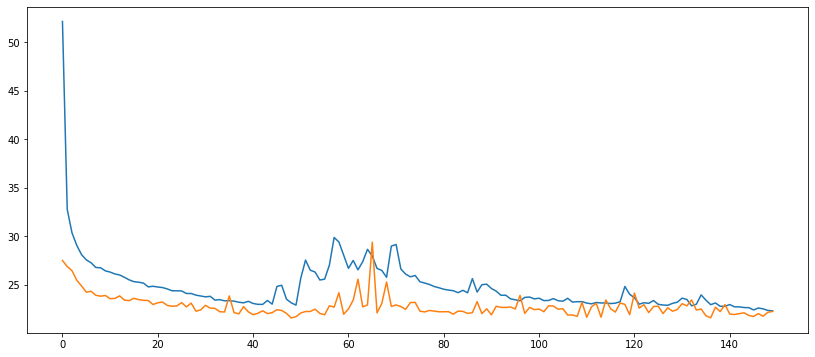

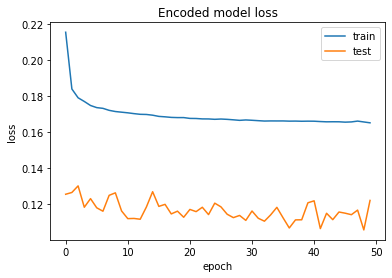

Overall accuracy of Convolutional Neural Network model: 0.9938203332104423


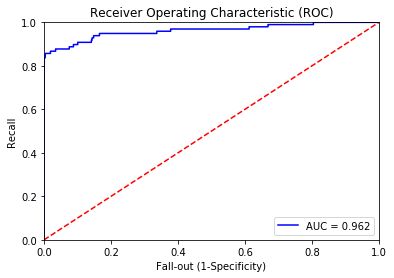

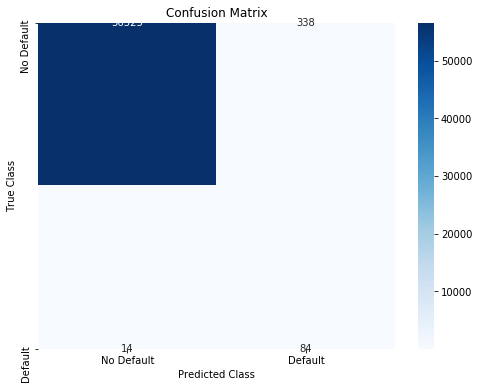

AUC(ROC): 0.9255993729289194
Precision: 0.1990521327014218
Recall: 0.8571428571428571
F1 score: 0.3230769230769231
False positives: 338
True positives: 84
False negatives: 14
True negatives: 56525
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 30)           0                                            
__________________________________________________________________________________________________
dense_44 (Dense)                (None, 27)           837         input_10[0][0]                   
_____________________________________________________________________________

454904/454904 [==============================] - 23s 51us/step - loss: 14.8805 - rec_loss: 23.9370 - kl_loss: 4.4305 - val_loss: 13.2333 - val_rec_loss: 23.1091 - val_kl_loss: 2.7703
Epoch 16/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.7270 - rec_loss: 23.6557 - kl_loss: 4.4321 - val_loss: 13.1235 - val_rec_loss: 22.7633 - val_kl_loss: 2.9071
Epoch 17/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.6886 - rec_loss: 23.6142 - kl_loss: 4.4253 - val_loss: 12.8436 - val_rec_loss: 22.2615 - val_kl_loss: 2.8612
Epoch 18/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.5967 - rec_loss: 23.4383 - kl_loss: 4.4279 - val_loss: 12.9014 - val_rec_loss: 22.3988 - val_kl_loss: 2.8433
Epoch 19/150
454904/454904 [==============================] - 23s 51us/step - loss: 14.5368 - rec_loss: 23.3192 - kl_loss: 4.4433 - val_loss: 12.7636 - val_rec_loss: 22.1271 - val_kl_loss: 2.8406
Epoch 20/150
454904/454904 [=====

Epoch 57/150
454904/454904 [==============================] - 27s 58us/step - loss: 13.7873 - rec_loss: 21.9516 - kl_loss: 4.5202 - val_loss: 12.4109 - val_rec_loss: 21.3275 - val_kl_loss: 2.9458
Epoch 58/150
454904/454904 [==============================] - 26s 57us/step - loss: 13.7825 - rec_loss: 21.9400 - kl_loss: 4.5261 - val_loss: 12.6420 - val_rec_loss: 21.9478 - val_kl_loss: 2.7929
Epoch 59/150
454904/454904 [==============================] - 26s 57us/step - loss: 13.7710 - rec_loss: 21.9279 - kl_loss: 4.5119 - val_loss: 12.4520 - val_rec_loss: 21.4946 - val_kl_loss: 2.8698
Epoch 60/150
454904/454904 [==============================] - 26s 57us/step - loss: 13.7199 - rec_loss: 21.8240 - kl_loss: 4.5169 - val_loss: 12.6113 - val_rec_loss: 21.7894 - val_kl_loss: 2.8951
Epoch 61/150
454904/454904 [==============================] - 27s 58us/step - loss: 13.7544 - rec_loss: 21.8857 - kl_loss: 4.5219 - val_loss: 12.4501 - val_rec_loss: 21.6147 - val_kl_loss: 2.7514
Epoch 62/150
454904/

Epoch 99/150
454904/454904 [==============================] - 25s 54us/step - loss: 13.9509 - rec_loss: 22.2014 - kl_loss: 4.6236 - val_loss: 12.6658 - val_rec_loss: 21.7147 - val_kl_loss: 3.0827
Epoch 100/150
454904/454904 [==============================] - 25s 54us/step - loss: 13.8322 - rec_loss: 21.9890 - kl_loss: 4.6120 - val_loss: 12.3841 - val_rec_loss: 21.3369 - val_kl_loss: 2.9094
Epoch 101/150
454904/454904 [==============================] - 25s 55us/step - loss: 13.8767 - rec_loss: 22.0884 - kl_loss: 4.6048 - val_loss: 12.5871 - val_rec_loss: 21.7161 - val_kl_loss: 2.9344
Epoch 102/150
454904/454904 [==============================] - 25s 55us/step - loss: 13.6781 - rec_loss: 21.7400 - kl_loss: 4.5636 - val_loss: 12.4057 - val_rec_loss: 21.3588 - val_kl_loss: 2.9354
Epoch 103/150
454904/454904 [==============================] - 25s 54us/step - loss: 13.5944 - rec_loss: 21.5945 - kl_loss: 4.5366 - val_loss: 12.3864 - val_rec_loss: 21.5003 - val_kl_loss: 2.7549
Epoch 104/150
45

454904/454904 [==============================] - 25s 55us/step - loss: 13.9083 - rec_loss: 22.1043 - kl_loss: 4.6315 - val_loss: 12.9484 - val_rec_loss: 22.4743 - val_kl_loss: 2.8785
Epoch 141/150
454904/454904 [==============================] - 25s 55us/step - loss: 13.8096 - rec_loss: 21.9499 - kl_loss: 4.5948 - val_loss: 12.4198 - val_rec_loss: 21.4651 - val_kl_loss: 2.8550
Epoch 142/150
454904/454904 [==============================] - 25s 55us/step - loss: 13.6089 - rec_loss: 21.6082 - kl_loss: 4.5539 - val_loss: 12.3573 - val_rec_loss: 21.1940 - val_kl_loss: 3.0110
Epoch 143/150
454904/454904 [==============================] - 25s 55us/step - loss: 13.5356 - rec_loss: 21.4657 - kl_loss: 4.5573 - val_loss: 12.4297 - val_rec_loss: 21.5026 - val_kl_loss: 2.8464
Epoch 144/150
454904/454904 [==============================] - 25s 55us/step - loss: 13.5969 - rec_loss: 21.6010 - kl_loss: 4.5443 - val_loss: 12.2816 - val_rec_loss: 21.1241 - val_kl_loss: 2.9096
Epoch 145/150
454904/454904 [

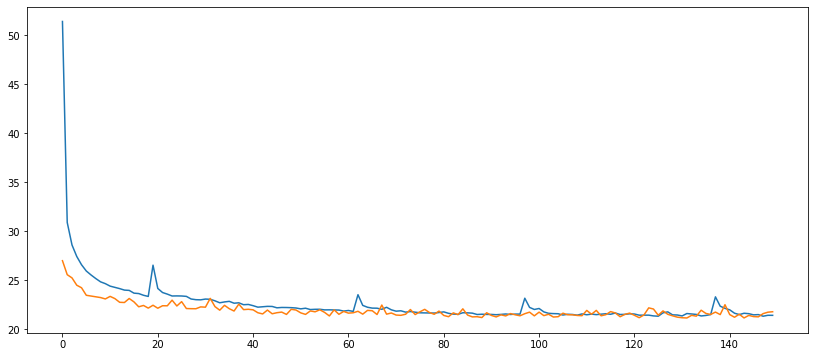

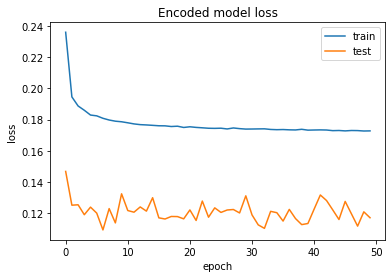

Overall accuracy of Convolutional Neural Network model: 0.9761766822913923


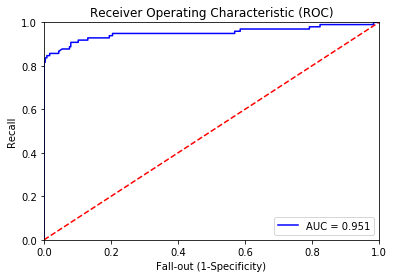

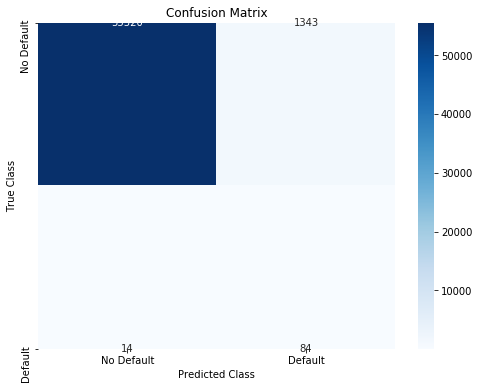

AUC(ROC): 0.9167623435776717
Precision: 0.05886475122634898
Recall: 0.8571428571428571
F1 score: 0.11016393442622952
False positives: 1343
True positives: 84
False negatives: 14
True negatives: 55520


In [12]:
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
#encoding_dim_4 = 20
#encoding_dim_5 = 18
hidden_dim = 15 #size of the hidden layer in encoder and decoder
latent_dim = 2 #number of latent variables to learn
learning_rate = 1e-3

#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation

tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)
    

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]

    
    scaler = preprocessing.StandardScaler()

    x_train, x_test = scaler.fit_transform(x_train), scaler.fit_transform(x_test) 
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SMOTE()
    X_res_train, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    sm=KMeansSMOTE()
    
    X_res_train, y_train_res = sm.fit_sample(X_res_train, y_train_res.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_res_train.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    

    input_dim = X_res_train.shape[1]
    x = input_dim

    input_layer = Input(shape=(input_dim,))

    encoder = Dense(encoding_dim_1, activation='tanh',activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_2, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    encoder = Dense(encoding_dim_3, activation='tanh')(encoder)
    encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_4, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    #encoder = Dense (encoding_dim_5, activation = 'tanh')(encoder)
    #encoder = BatchNormalization()(encoder)

    encoder = Dense(hidden_dim, activation='tanh' , name='encoder_hidden')(encoder)
    encoder = BatchNormalization()(encoder)

    z_mean = Dense(latent_dim, name='z_mean')(encoder)
    z_log_var = Dense(latent_dim, name='z_log_var')(encoder)
    
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    z = Lambda(sampling, name='z_sampled')([z_mean, z_log_var])
    t = BatchNormalization()(z)

    decoder1 = Dense(hidden_dim, activation='tanh')(t)
    decoder1 = BatchNormalization()(decoder1) 

    #decoder = Dense(encoding_dim_5, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    #decoder = Dense(encoding_dim_4, activation = 'tanh')(decoder)
    #decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_3, activation='tanh')(decoder1)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_2, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)

    decoder = Dense(encoding_dim_1, activation='tanh')(decoder)
    decoder = BatchNormalization()(decoder)


    decoded_mean = Dense(input_dim, activation=None, name='decoded_mean')(decoder)


    vae = Model(inputs=input_layer, outputs=decoded_mean)
    
    def rec_loss(y_true, y_pred):
        return K.sum(K.square(y_true - y_pred), axis=-1)

    def kl_loss(y_true, y_pred):
        return - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)

    def vae_loss(x, decoded_mean):
        rec_loss = K.sum(K.square(x - decoded_mean), axis=-1)
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        return K.mean((rec_loss + kl_loss) / 2)

    vae.compile(optimizer=RMSprop(lr=learning_rate), loss=vae_loss, metrics=[rec_loss, kl_loss])
    vae.summary()
    
    n_epochs = 150
    batch_size = 128

#early_stopping = EarlyStopping(monitor='loss', patience=10, min_delta=1e-5) #stop training if loss does not decrease with at least 0.00001
#reduce_lr = ReduceLROnPlateau(monitor='loss', patience=5, min_delta=1e-5, factor=0.2) #reduce learning rate (divide it by 5 = multiply it by 0.2) if loss does not decrease with at least 0.00001

#callbacks = [reduce_lr]

#collect training data in history object
    history = vae.fit(X_res_train, X_res_train, 
                  validation_data=(x_test, x_test),
                  batch_size=batch_size,
                  shuffle = True,
                  epochs=n_epochs,
                  )
    
    
    fig = plt.figure(figsize=(14, 6))
    ax = fig.gca()
    ax.plot(history.history['rec_loss']);
    ax.plot(history.history['val_rec_loss']);
    
    
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, decoder1)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(X_res_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape
    
    #--------------------------------Build new model using encoded data--------------------------

    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train_res, epochs=50,validation_data=(encoded_test_x, y_test), verbose=1)

    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    

        #---------------------------------Predictions and visuallizations-----------------------#Predict on test set
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()


    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    

    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)
    

      

In [13]:

print("Average tn = " + str(Average(tn_summary)))
print("Average fp = " + str(Average(fp_summary)))
print("Average fn = "+ str(Average(fn_summary)))    
print("Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print("Average Precision = {:0.2f}%".format(Average_precision*100))

print("Average Recall = {:0.2f}%".format(Average_recall*100))

print("Average F1 score = {:0.2f}%".format(Average_f1_score*100))

Average tn = 55845.2
Average fp = 1017.8
Average fn = 12.8
Average tp = 85.6
Average Precision = 7.76%
Average Recall = 86.99%
Average F1 score = 14.25%


In [14]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print("Total fp: " + str(total_fp))
print(" Total fn:" + str(total_fn))
print(" Total tp:" + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print("Total Precision = " + str(Total_Precision))
print("Total Recall = " + str(Total_Recall))
print("Total F1_score = " + str(Total_F1_score))
    


 Total tn: 279226
Total fp: 5089
 Total fn:64
 Total tp:428
Total Precision = 0.07757839405473989
Total Recall = 0.8699186991869918
Total F1_score = 0.1424529871858878
